In [12]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import ticker

data_dir = os.path.join(os.getcwd(), 'clean_data')

In [13]:
files = [
    'laptop_stress',
    'laptop_no_stress',
    'linux_stress',
    'linux_no_stress',
    'xenomai_stress',
    'xenomai_no_stress',
]

df = pd.DataFrame()
for file in files:
    path = os.path.join(data_dir, file)
    _df = pd.read_fwf(path, header=None)
    df[file] = _df[1]

# index string of 0.500ms to float of 0.5
_df[0] = _df[0].str.replace('ms:', '').astype(float)
df.index = _df[0]

# too high delays accumulated in last element, drop last row
df = df.drop(df.index[-20:])

df.describe()

,laptop_stress,laptop_no_stress,linux_stress,linux_no_stress,xenomai_stress,xenomai_no_stress
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,77.122449,204.102041,162.714286,106.897959,203.591837,203.591837
std,514.354678,583.973253,1057.843069,496.013073,632.288071,611.206489
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000
75%,1.000000,271.000000,4.000000,5.000000,17.000000,0.000000
max,3603.000000,3980.000000,7408.000000,3199.000000,3621.000000,2640.000000


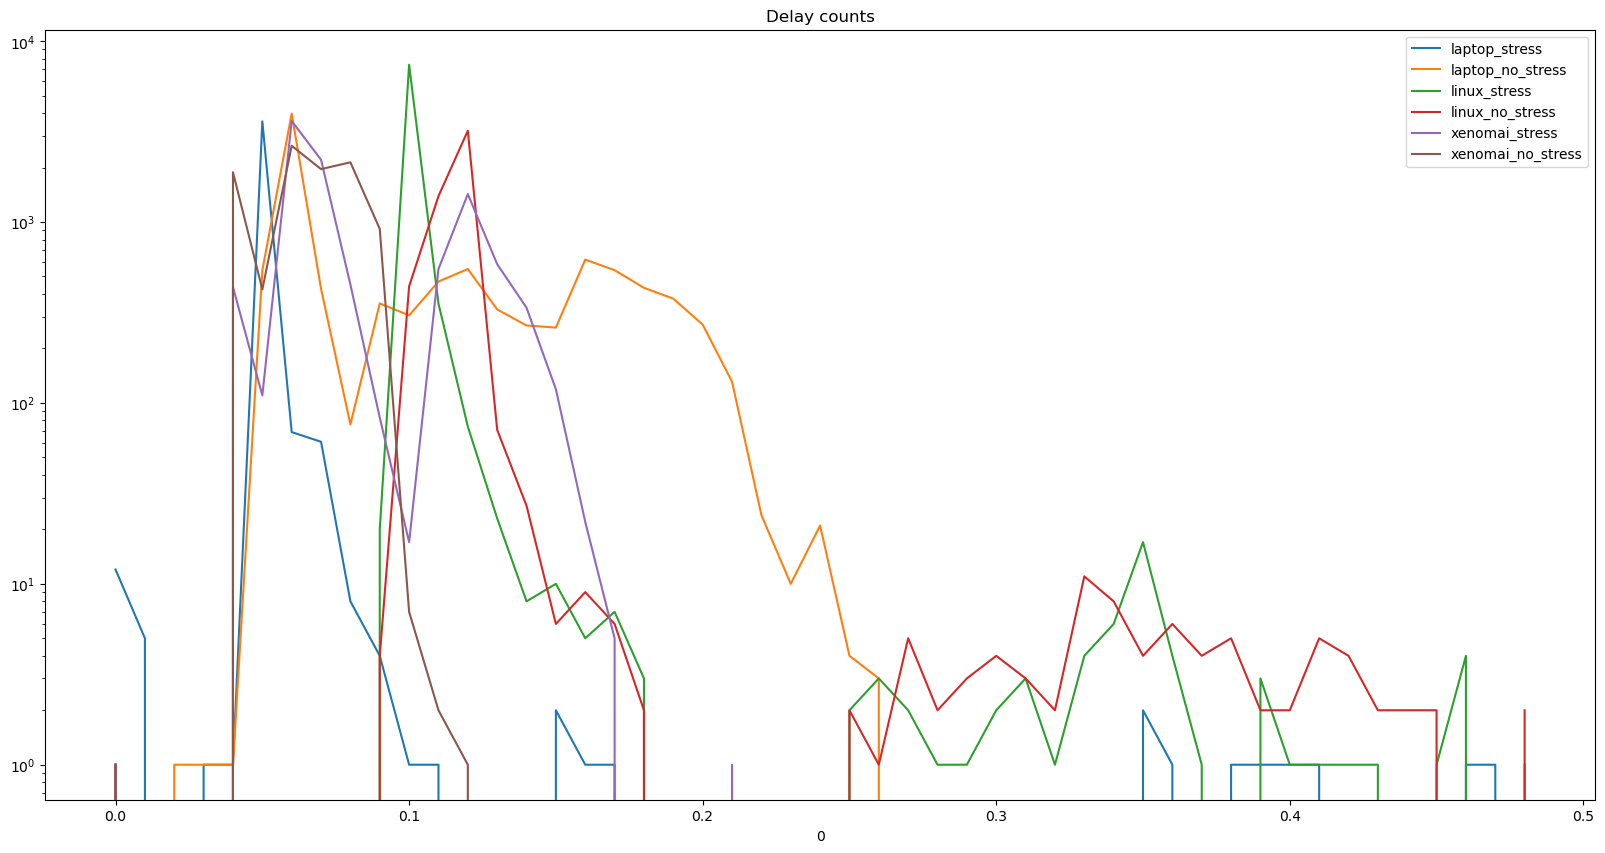

In [14]:
# show counts for each delay, use logarithmic scale on y axis
df.plot(logy=True, figsize=(20, 10), title='Delay counts')
plt.show()

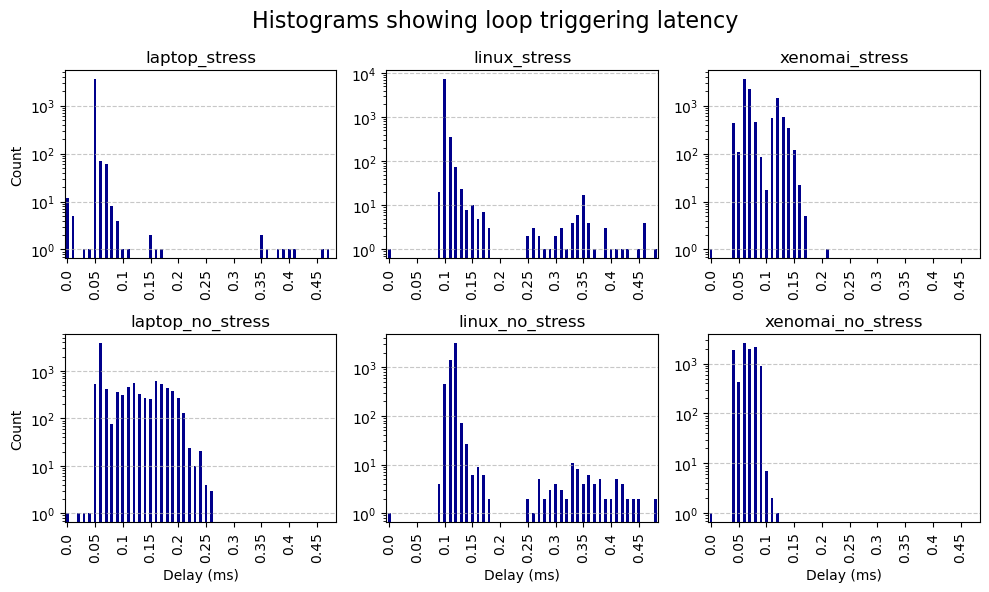

In [28]:
# create a figure with 6 subplots
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(10, 6))

# loop through the columns and create a barplot for each test in a separate subplot
for i, col in enumerate(df.columns):
    ax = axs[i%2, i//2]
    df[col].plot(logy=True, kind='bar', ax=ax, title=col, color='darkblue')
    ax.set_ylabel('')
    ax.set_xlabel('')
    if i in (0, 1):
        ax.set_ylabel('Count')
    if i in (1, 3, 5):
        ax.set_xlabel('Delay (ms)')
    ax.xaxis.set_major_locator(ticker.MaxNLocator())
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# share x and y axis labels
# fig.text(0.5, 0.04, 'Delay (ms)', ha='center')
fig.suptitle('Histograms showing loop triggering latency', fontsize=16)
fig.tight_layout()
plt.show()

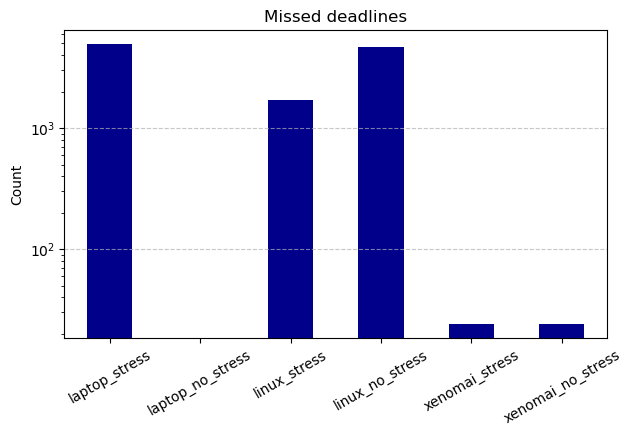

In [35]:
missed_deadlines = {
    'laptop_stress': 4936,
    'laptop_no_stress': 0,
    'linux_stress': 1693,
    'linux_no_stress': 4668,
    'xenomai_stress': 24,
    'xenomai_no_stress': 24,
}

missed_deadlines = pd.Series(missed_deadlines)
fig, ax = plt.subplots(figsize=(7, 4))
missed_deadlines.plot(kind='bar', ax=ax, color='darkblue', logy=True)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_title('Missed deadlines')
ax.set_ylabel('Count')
ax.set_xlabel('')
plt.xticks(rotation=30)
  
plt.show()
